<a href="https://colab.research.google.com/github/dayanebravo/Est_Graf_py/blob/main/extensao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###ESTATÍSTICA E GRÁFICOS COM PYTHON

# Conhecendo o conjunto de dados

In [264]:
import pandas as pd  # biblioteca com ferramentas para análise de dados/dataframes
import numpy as np  # biblioteca com operações matemáticas

In [265]:
df = pd.read_csv("https://raw.githubusercontent.com/dayanebravo/Est_Graf_py/main/Employee.csv")  # ler dados no formato CSV

# Extraído do Kaggle:
# https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

In [266]:
df.head()  #  exibe as primeiras linhas da tabela

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [267]:
df.shape  # informa a dimensão da tabela (linhas, colunas)

(4653, 9)

In [268]:
df.info()  # informações gerais dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [269]:
df.dtypes  # informa os tipos de dados de cada coluna

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [270]:
df.City          #  acessar dados da coluna

0       Bangalore
1            Pune
2       New Delhi
3       Bangalore
4            Pune
          ...    
4648    Bangalore
4649         Pune
4650    New Delhi
4651    Bangalore
4652    Bangalore
Name: City, Length: 4653, dtype: object

In [271]:
df["City"]  #  outra forma de acessar os dados da coluna

0       Bangalore
1            Pune
2       New Delhi
3       Bangalore
4            Pune
          ...    
4648    Bangalore
4649         Pune
4650    New Delhi
4651    Bangalore
4652    Bangalore
Name: City, Length: 4653, dtype: object

In [272]:
df["Age"].sum()

136767

In [273]:
df["Gender"].sum()   # somar palavras

'MaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemal

In [274]:
df.dropna(axis="columns")  # remove colunas com ao menos um valor inválido - mas não altera o dataframe original
df.dropna()  # remove linhas com ao menos um valor inválido - mas não altera o dataframe original
ndf = df.dropna()  # criando um NOVO dataframe com as linhas inválidas removidas
ndf.info()  # informações gerais dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


# Variáveis Qualitativas e Quantitativas


In [275]:
df.select_dtypes(include=['object'])  # seleciona os valores qualitativos encontrados nos dados

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes
...,...,...,...,...
4648,Bachelors,Bangalore,Female,No
4649,Masters,Pune,Male,No
4650,Masters,New Delhi,Male,No
4651,Bachelors,Bangalore,Male,Yes


In [276]:
df.select_dtypes(include=['number'])  # seleciona os valores quantitativos encontrados nos dados

# CUIDADO COM OS VALORES BINÁRIOS/CODIFICADOS

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
0,2017,3,34,0,0
1,2013,1,28,3,1
2,2014,3,38,2,0
3,2016,3,27,5,1
4,2017,3,24,2,1
...,...,...,...,...,...
4648,2013,3,26,4,0
4649,2013,2,37,2,1
4650,2018,3,27,5,1
4651,2012,3,30,2,0


In [277]:
print(type(df.ExperienceInCurrentDomain[1]))  # valor quantitativo discreto (finito) da coluna e posição indicada


<class 'numpy.int64'>


# Frequência de dados

>frequência absoluta

In [278]:
df.Education.value_counts()   #  frequência absoluta - dado qualitativo

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [279]:
df.ExperienceInCurrentDomain.value_counts()    # frequência absoluta - dado quantitativo

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

>frequência relativa

In [280]:
print("número total de observações: ", len(df.Education) )   #  número total de observações - linhas

np.divide(df.Education.value_counts(), len(df.Education))  #  frequência relativa da coluna indicada

número total de observações:  4653


Bachelors    0.773909
Masters      0.187621
PHD          0.038470
Name: Education, dtype: float64

In [281]:
print("número total de observações: ", len(df.ExperienceInCurrentDomain) )   #  número total de observações - linhas

np.divide(df.ExperienceInCurrentDomain.value_counts(), len(df.ExperienceInCurrentDomain))  #  frequência relativa da coluna indicada

número total de observações:  4653


2    0.233613
4    0.200086
5    0.197507
3    0.168923
1    0.119923
0    0.076295
7    0.001934
6    0.001719
Name: ExperienceInCurrentDomain, dtype: float64

# Alguns Gráficos

In [282]:
import matplotlib.pyplot as plt  # biblioteca básica para gráficos
import seaborn as sn  # biblioteca auxiliar para gráficos

In [283]:
from seaborn.widgets import color_palette
# https://seaborn.pydata.org/tutorial/color_palettes.html
sn.set(style = "darkgrid", palette = 'dark')  # definir estilo de gráfico e cor

>Gráfico de barras

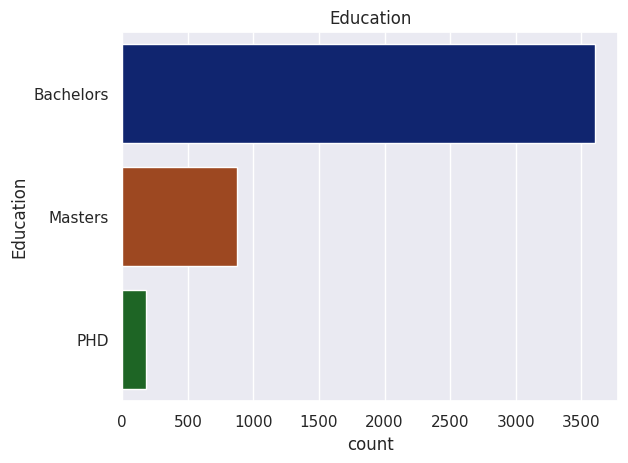

In [284]:
sn.countplot(y = df.Education)  # gráfico barra - frequência da coluna indicada no eixo y
plt.title("Education")  # título do gráfico

#plt.ylabel('')  # nome do eixo y
#plt.xlabel('')  # nome do eixo x

plt.show()  # exibir gráfico


>gráfico colunas

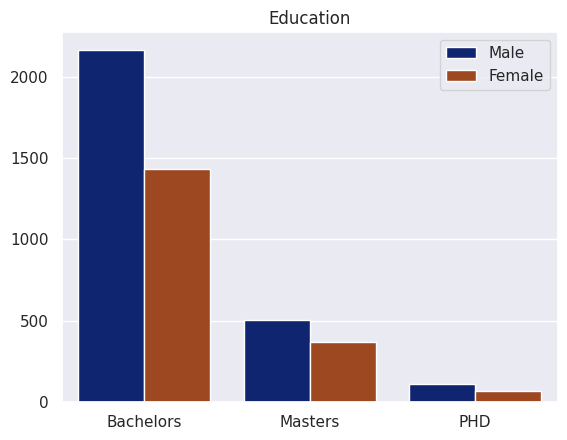

In [285]:
sn.countplot(x=df.Education, hue=df.Gender)  # gráfico coluna agrupada - frequência da coluna indicada no eixo x - com legenda
plt.title("Education")  # título do gráfico
plt.ylabel('')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.legend(loc="best")   # posição da legenda

#plt.legend(bbox_to_anchor=(1.3,0.8))  # posição específica da legenda

plt.show()  # exibir gráfico

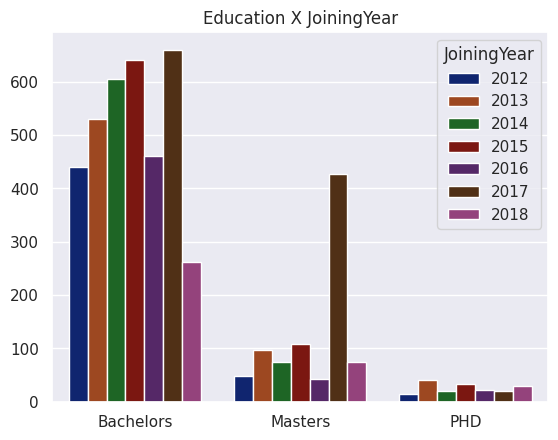

In [286]:
sn.countplot(x=df.Education, hue=df.JoiningYear)  # gráfico coluna
# frequência da coluna indicada no eixo x - com legenda

plt.title("Education X JoiningYear")  # título do gráfico
plt.ylabel('')  # nome do eixo y
plt.xlabel('')  # nome do eixo x

#plt.legend(loc="center")   # posição da legenda

plt.show()  # exibir gráfico

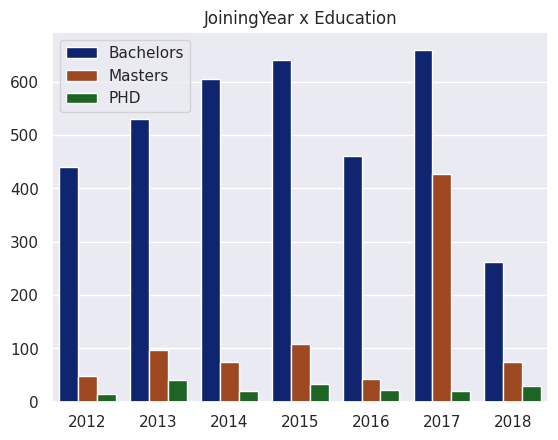

In [287]:
sn.countplot(x=df.JoiningYear, hue=df.Education)  # gráfico coluna agrupada
# frequência da coluna indicada no eixo x - com legenda

plt.title("JoiningYear x Education")  # título do gráfico
plt.ylabel('')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.legend(loc="best")   # posição da legenda
plt.show()  # exibir gráfico

>Gráfico de setores

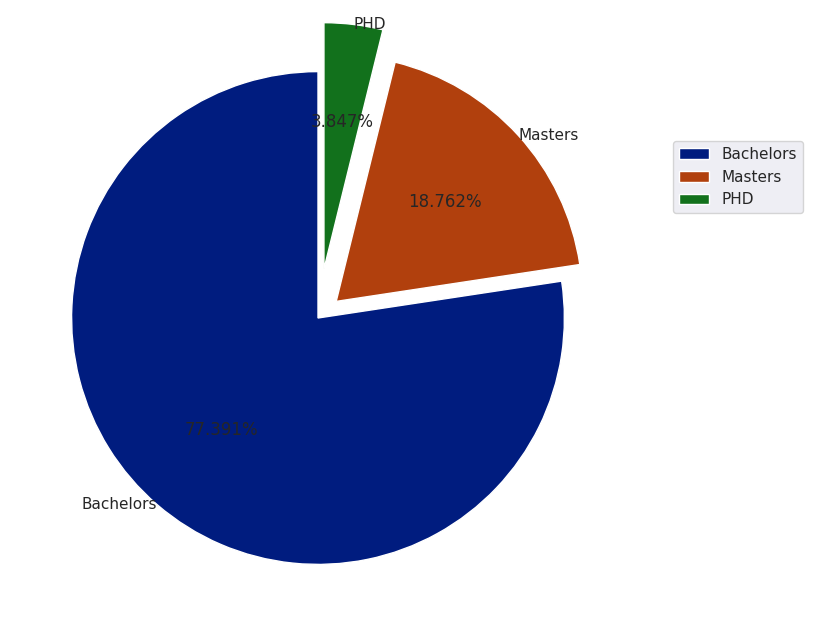

In [288]:
sizes = df.Education.value_counts()  # tamanho das fatias
labels = df['Education'].value_counts().index   # rótulos das fatias
plt.figure(figsize=(8,8))  # tamanho do gráfico

plt.pie(sizes, labels=labels, explode=(0,0.1,0.2),
        autopct='%1.3f%%', labeldistance=1, startangle=90)
# gráfico setores - fatias destacadas na ordem - percentual automático 3 casas decimais

plt.legend(bbox_to_anchor=(1.3,0.8))  # posição específica da legenda
plt.show()  # exibir gráfico

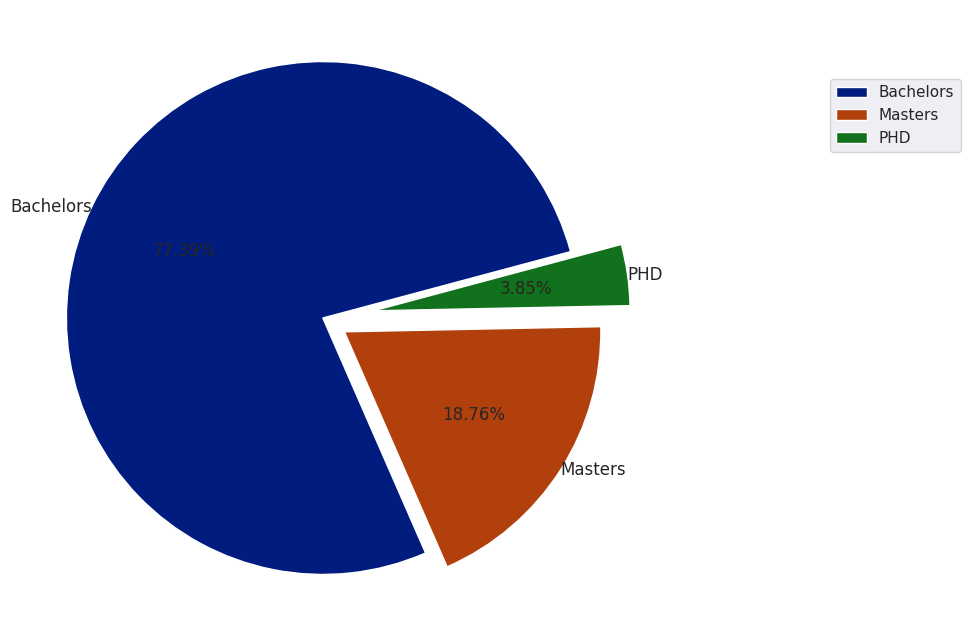

In [289]:

sizes = df['Education'].value_counts() # tamanho das fatias

sizes.plot(kind='pie', figsize=(8,8), fontsize=12, explode=(0,0.1,0.2), autopct='%1.2f%%', labeldistance=1, startangle=15)
# gráfico setores/ tamanho gráfico e fonte/ fatias destacadas na ordem/ percentual automático 2 casas decimais

plt.axis("equal")  # escala dos eixos igual
plt.ylabel('') # nome do eixo y
plt.legend(bbox_to_anchor=(1.5,0.9)) # posição específica da legenda
plt.show() # exibir gráfico

>Gráfico de Frequência Absoluta

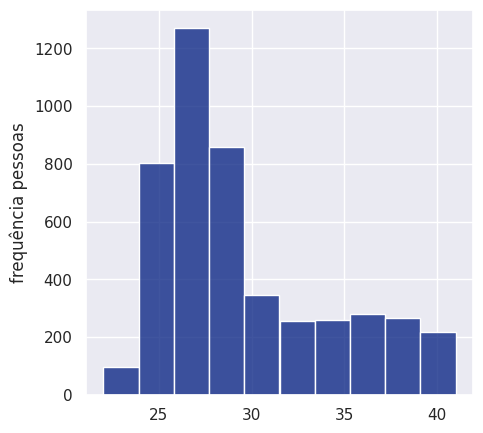

In [290]:
sizes = df.Age  # coluna analisada
plt.figure(figsize=(5,5))   # tamanho do gráfico

sn.histplot(sizes, bins=10)  # bins: quantidade de intervalos

plt.ylabel('frequência pessoas')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.show()  # exibir gráfico

>Gráfico de Frequência Acumulada

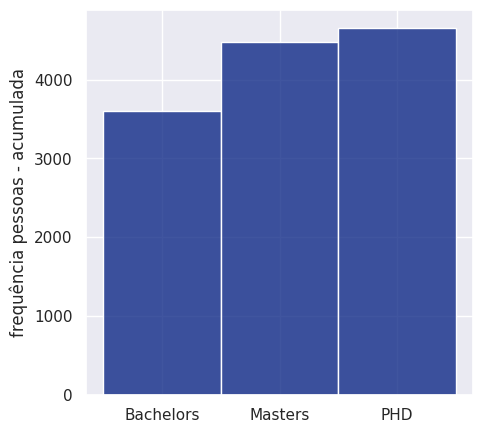

In [291]:
sizes = df.Education  # coluna analisada
plt.figure(figsize=(5,5))   # tamanho do gráfico

sn.histplot(sizes, cumulative=True)  # quantidade de intervalos/ acumulativo

plt.ylabel('frequência pessoas - acumulada')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.show()  # exibir gráfico


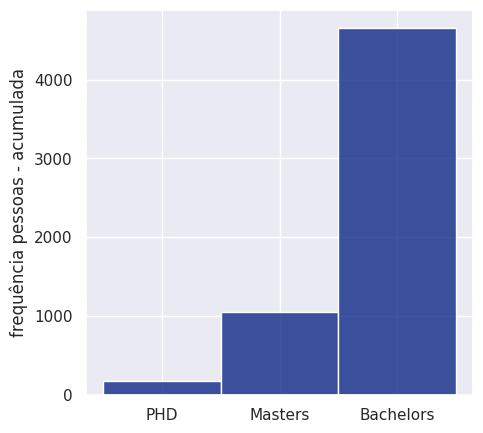

In [292]:

sizes = df.Education.sort_values(ascending=False)  # coluna analisada ordenada
plt.figure(figsize=(5,5))   # tamanho do gráfico

sn.histplot(sizes, cumulative=True)  # quantidade de intervalos/ acumulativo

plt.ylabel('frequência pessoas - acumulada')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.show()  # exibir gráfico


>Gráfico de Frequência Relativa

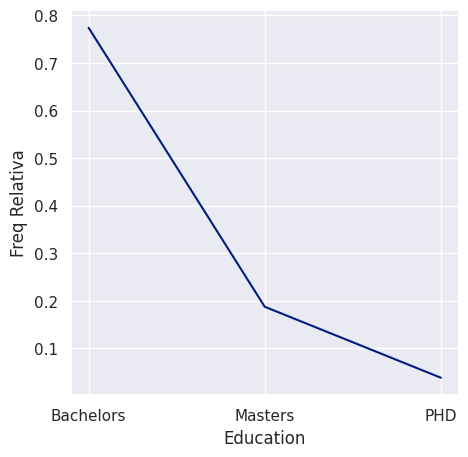

In [293]:
sizes = np.divide(df.Education.value_counts(), len(df.Education))  # coluna analisada dividida pelo seu tamanho
plt.figure(figsize=(5,5))  # tamanho do gráfico

plt.plot(sizes) # plotar dados

plt.ylabel('Freq Relativa')  # nome do eixo y
plt.xlabel('Education')  # nome do eixo x
plt.show()  # exibir gráfico

#Somatórios

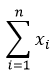

In [294]:
def somatorio(x): # criar uma função que precisa de uma entrada x
    if x==1:
      return 1  # para x=1 retorna a saída e encerra a função
    else:  # caso x diferente de 1
      return x + somatorio(x-1)  # retorna a soma do termo e seu antecessor

x = int(input("Calcular o somatório de 1 até: "))  # construir a entrada x
print("Resultado do somatório: ", somatorio(x) )  # print que chama a função definida calculada em x

Calcular o somatório de 1 até: 5
Resultado do somatório:  15


>Soma dos quadrados

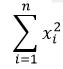

In [295]:
def somatorio(x): # criar uma função que precisa de uma entrada x
    if x==1:
      return 1  # para x=1 retorna a saída e encerra a função
    else:  # caso x diferente de 1
      return x**2 + somatorio(x-1)  # retorna a soma do termo elevado ao quadrado e seu antecessor - soma dos quadrados

x = int(input("Calcular o somatório de 1 até: "))  # construir a entrada x
print("Resultado da soma dos quadrados: ",somatorio(x) ) # print que chama a função definida calculada em x

Calcular o somatório de 1 até: 5
Resultado da soma dos quadrados:  55


Soma do desvio

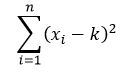

In [296]:
def somatorio(x): # criar uma função que precisa de uma entrada x
  if x==1:
    return 1  # para x=1 retorna a saída e encerra a função
  else:  # caso x diferente de 1
    return (x-k)**2 + somatorio(x-1)
# retorna o termo subtraído da média elevado ao quadrado e o resultado é somado ao seu antecessor

x = int(input("Calcular o somatório de 1 até: "))  # construir a entrada x
k = int(input("O valor médio dos dados é: "))  # informar a média
print("Resultado da função: ",somatorio(x) )  # print que chama a função definida calculada em x

Calcular o somatório de 1 até: 5
O valor médio dos dados é: 5
Resultado da função:  15


In [297]:
x = df.Age  # construir a entrada x
k = df.Age.mean()  # calcular a média

def dm(x): # criar uma função que precisa de uma entrada x
  aux = np.array((x-k)**2)  # auxiliar que monta um vetor com a entrada subtraída da média e esse resultado é elevado ao quadrado
  return aux.sum()  # saída da função: soma dos termos do vetor aux

print("Resultado da função: ", dm(x) )  # print que chama a função definida calculada em x

Resultado da função:  108350.27079303673


# Medidas de Tendência Central: Mediana, Moda e Média


>Mediana

In [298]:
np.median(df.Age)  # usando numpy

28.0

In [299]:
df.Age.median()  # usando pandas

28.0

>Moda

In [300]:
df.Age.mode()  # moda quantitativas

0    26
Name: Age, dtype: int64

In [301]:
df.City.mode()  #  moda qualitativas

0    Bangalore
Name: City, dtype: object

>Média aritmética

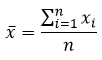

In [302]:
pdmedia = df.ExperienceInCurrentDomain.mean()   # valor quantitativo contínuo - média pela Pandas
print("A média é: ", pdmedia)
type(pdmedia)  # tipo da variável calculada

A média é:  2.905652267354395


numpy.float64

In [303]:
npmedia = np.mean(df.ExperienceInCurrentDomain)   # valor quantitativo contínuo - média pela NUMPY
print("A média é: ", npmedia)

A média é:  2.905652267354395


>Média Ponderada

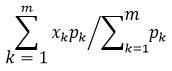

In [304]:
pesos_avaliacoes = [15,15,30,30,10]  # Lista com os pesos de cada avaliação
soma_pesos_avaliacoes = 100  # soma dos pesos
print("Índices das avaliações:",
      "\n 1 - APOL 1,",
      "\n 2 - APOL 2,",
      "\n 3 - Prova Objetiva,",
      "\n 4 - Atividade Prática,",
      "\n 5 - Prova Discursiva \n")
# orientação para o usuário

listar_notas = []  # Lista com as notas de cada avaliação
pesoXavaliacao = []  # Lista com os produtos do peso e da avaliação associada ao índice i
num_avaliacoes = 5  # Número de avaliações
i = 0  # Índice i que vai percorrer todas as notas

for i in range(num_avaliacoes): # cada nota i dentro do número de avaliações
   print("\n Avaliação índice: ", i+1) # mensagem para usuário
   listar_notas.append(int(input("Insira a nota da avaliação de acordo com o índice acima: ")))  # entrada da nota em listar_notas
   pesoXavaliacao.append(pesos_avaliacoes[i]*listar_notas[i])  # inserir em pesoXavaliacao o resultado da multiplicação do pesoXavaliacao pela nota

# Calcular a soma dos produtos em pesoXavaliacao
somar_produtos = 0
for k in pesoXavaliacao:  # cada entrada k em pesoXavaliacao
    somar_produtos = somar_produtos+k  # soma das entradas de pesoXavaliacao

print("Esta é a média ponderada das suas notas: ", somar_produtos/soma_pesos_avaliacoes) # mostra o total do produto da nota pelo peso - média final

Índices das avaliações: 
 1 - APOL 1, 
 2 - APOL 2, 
 3 - Prova Objetiva, 
 4 - Atividade Prática, 
 5 - Prova Discursiva 


 Avaliação índice:  1
Insira a nota da avaliação de acordo com o índice acima: 10

 Avaliação índice:  2
Insira a nota da avaliação de acordo com o índice acima: 10

 Avaliação índice:  3
Insira a nota da avaliação de acordo com o índice acima: 10

 Avaliação índice:  4
Insira a nota da avaliação de acordo com o índice acima: 10

 Avaliação índice:  5
Insira a nota da avaliação de acordo com o índice acima: 10
Esta é a média ponderada das suas notas:  10.0


>Média geométrica.

Utilizada quando os elementos crescem de maneira sucessiva

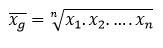

In [305]:
def geo_mean(k):  # criar uma função que precisa de uma entrada k
  aux = np.array(k)  # auxiliar que monta um vetor com a entrada
  return aux.prod()**(1.0/len(aux))  # saída da função: produto dos termos do vetor aux elevado à (1/n)

x=[2,4,8,16,32]  # entrada como vetor
print(geo_mean(x))  # print que chama a função definida calculada em x

8.000000000000002


>Média harmônica

Utilizada quando os dados do conjunto são grandezas inversamente proporcionais

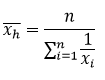

In [306]:
x = [1,1/2,1/3,1/4,1/5]  # entrada como vetor
n = 5  # quantidade de termos do vetor

def soma_inv(k):  # criar uma função que precisa de uma entrada k
  aux = 1/np.array(k)  # auxiliar que monta um vetor com o valor inverso da entrada
  return aux.sum()  # saída da função: soma dos termos do vetor aux

print(n/soma_inv(x))  # print que divide n pela função calculada em x

0.3333333333333333


In [307]:
import statistics
statistics.harmonic_mean(x)

0.3333333333333333

# Representação numérica

In [308]:
print("%.2f" % pdmedia)   # arredondamento 2 casas decimais
print("%.5f" % pdmedia)   # arredondamento 5 casas decimais
print('{:e}'.format(pdmedia))   # notação científica
print('{:.2e}'.format(pdmedia))   # notação científica com 2 casas decimais


2.91
2.90565
2.905652e+00
2.91e+00


# Medidas de Tendência Central: Dados Descritivos

> Mediana, média e moda

In [309]:
df.Education.mode()   # moda

0    Bachelors
Name: Education, dtype: object

In [310]:
# np.mean(df.Education)  #  NÃO FUNCIONA!!!
k=df.Education.value_counts()
np.mean(k)  # essa média não existe!!!

1551.0

In [311]:
df.groupby('Education').agg({"Age": "mean"})  # agrupa dados por Education agregando pela Age média

,Age
Education,
Bachelors,29.422938
Masters,29.290951
PHD,29.296089


In [312]:
df.groupby('Gender').agg({"Age": "mean"})  # agrupa dados por Gender agregando pela mean das Age

,Age
Gender,
Female,29.41600
Male,29.37797


In [313]:
tabela = df.groupby(['Gender','Education']).agg({'Age': "mean"})  # agrupa: Education / Gender / idade média
#tabela.reset_index(inplace=True)  # preenche todas as linhas da coluna
print(tabela)

                        Age
Gender Education           
Female Bachelors  29.396516
       Masters    29.490566
       PHD        29.420290
Male   Bachelors  29.440443
       Masters    29.143426
       PHD        29.218182


#Quartil

Um quartil é qualquer um dos três valores que divide o conjunto ordenado de dados em quatro partes iguais, e assim cada parte representa 1/4 da amostra ou população.

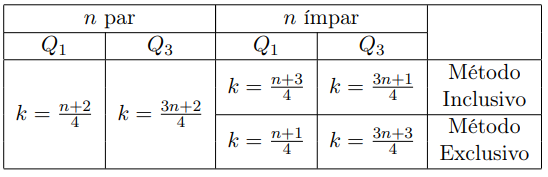

In [314]:
dfo = sorted(df.Age)  # ordena a coluna analisada
n=len(dfo)  # tamanho da coluna

Q1=int((n+3)/4)  # fórmula posição primeiro quartil
Q3=int((3*n+1)/4)  # fórmula posição terceiro quartil

print("A posição do primeiro quartil é: ", Q1, "e do terceiro quartil é: " ,Q3)  # aqui encontramos a posição
print("O valor do primeiro quartil é: ", dfo[Q1], "e do terceiro quartil é: ", dfo[Q3])  # aqui encontramos o valor associado àquela posição

A posição do primeiro quartil é:  1164 e do terceiro quartil é:  3490
O valor do primeiro quartil é:  26 e do terceiro quartil é:  32


O valor de Q1 é:  26.0
O valor de Q3 é: :  32.0


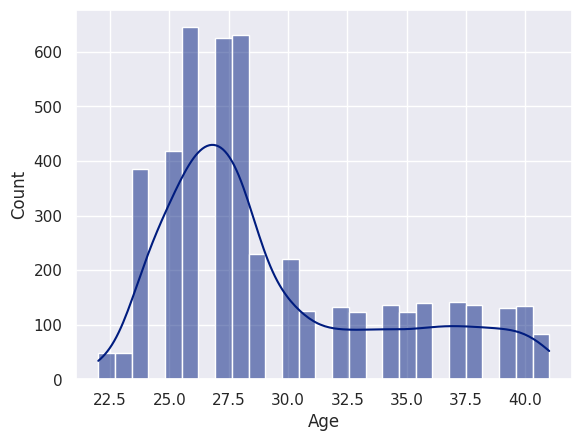

In [315]:
print("O valor de Q1 é: ", np.quantile(df.Age, .25))   # usa a função da np para encontrar o valor do quartil
print("O valor de Q3 é: : ", np.quantile(df.Age, .75))  # usa a função da np para encontrar o valor do quartil

sn.histplot(x=df.Age, kde=True)
plt.show()

>Boxplot

boxplot contém o limite inferior e superior, os quartis, a mediana, como os dados estão distribuídos e os possíveis outliers.

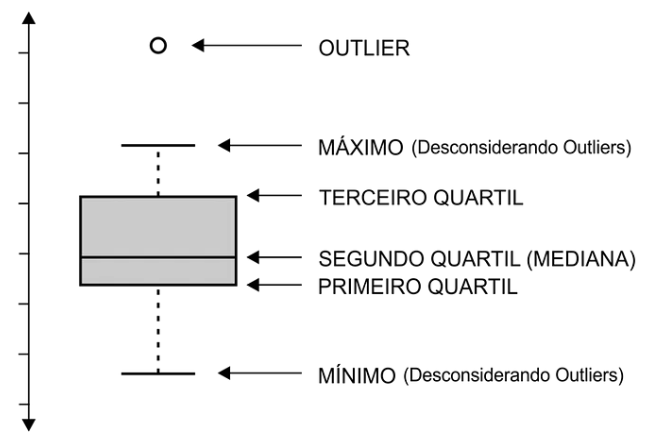

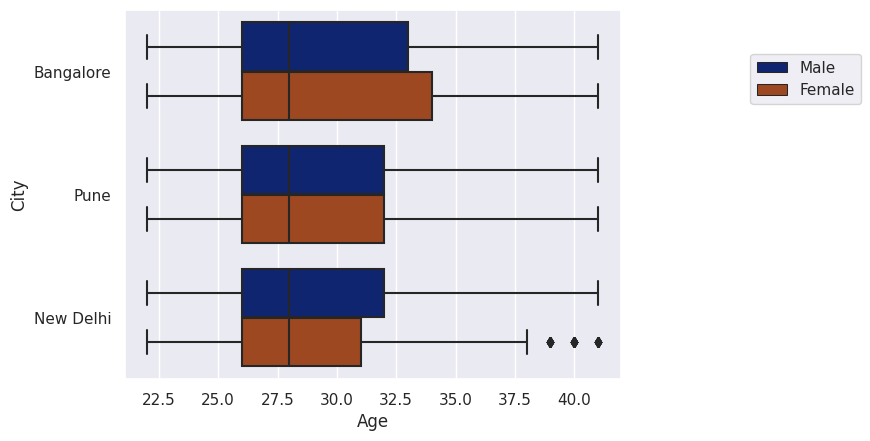

In [316]:
sn.boxplot(x='Age', y='City', data=df, hue='Gender')
plt.legend(bbox_to_anchor=(1.5,0.9)) # posição específica da legenda



>Intervalo Interquartil

In [317]:
k = Q3-Q1  # fórmula
print("A posição do primeiro quartil é: ", Q1, "e do terceiro quartil é: " ,Q3,
      "\n Portanto o intervalo interquartil é: ", k)

A posição do primeiro quartil é:  1164 e do terceiro quartil é:  3490 
 Portanto o intervalo interquartil é:  2326


#Percentil

Os percentis são medidas que dividem a amostra em 100 partes

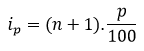

In [318]:
dfo = sorted(df.Age)  # ordena a coluna analisada
n=len(dfo)  # tamanho da coluna
p=int(input("Qual percentil quer calcular? "))  # entrada informada pelo usuário

ip=int((n+1)*p/100)  # fórmula posição percentil

print("A posição do percentil é: ", ip, "e o valor do percentil é: " ,dfo[ip])  # dada a posição, informa o dado referente

Qual percentil quer calcular? 25
A posição do percentil é:  1163 e o valor do percentil é:  26


In [319]:
p=int(input("Qual percentil quer calcular? "))  # entrada informada pelo usuário
print('o valor do percentil é: ', np.percentile(df.Age, p))  # usa a função da np para encontrar o valor do percentil

Qual percentil quer calcular? 25
o valor do percentil é:  26.0


#Medidas de dispersão

>Amplitude

In [320]:
k = df['Age'].max()-df['Age'].min()  # fórmula
print("A maior idade é: ", df['Age'].max(), "e a menor: ", df['Age'].min(),
      "\n Portanto a amplitude é: ", k)

A maior idade é:  41 e a menor:  22 
 Portanto a amplitude é:  19


>Desvio médio absoluto

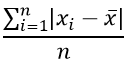

In [321]:
def somatorio(x): # criar uma função que precisa de uma entrada x
    if x==1:
        return 1  # para x=1 retorna a saída e encerra a função
    else:  # caso x diferente de 1
        return abs(x-k) + somatorio(x-1) # retorna o termo subtraído da média em valor absoluto e soma ao seu antecessor

x = int(input("Calcular o somatório de 1 até: "))  # construir a entrada x
k = int(input("O valor médio dos dados é: "))  # informar a média
print("Resultado do desvio absoluto da média: ", somatorio(x)/x )  # print do desvio médio absoluto

Calcular o somatório de 1 até: 5
O valor médio dos dados é: 5
Resultado do desvio absoluto da média:  1.4


In [322]:
x = df.Age  # construir a entrada x
k = df.Age.mean()  # calcular a média
n = len(df.Age)  # tamanho da entrada

def dm(x): # criar uma função que precisa de uma entrada x
  aux = np.array(abs(x-k))  # auxiliar que monta um vetor com a entrada subtraída da média em valor absoluto
  return aux.sum()/n  # saída da função: soma dos termos do vetor aux dividida por n

print("Resultado do desvio absoluto da média: ", dm(x) )  # print do desvio médio absoluto

Resultado do desvio absoluto da média:  3.9693457061249977


#Variância e Desvio Padrão


>Variância

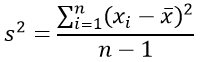

In [323]:
x = df.Age  # construir a entrada x
k = df.Age.mean()  # calcular a média
n = len(df.Age)  # tamanho da entrada

def dmv(x): # criar uma função que precisa de uma entrada x
  aux = np.array((x-k)**2)  # auxiliar que monta um vetor com a entrada subtraída da média elevada ao quadrado
  return aux.sum()/(n-1)  # saída da função: soma dos termos do vetor aux dividida por (n-1)

print("Resultado da variância: ", dmv(x) )  # informa o resultado da variância

Resultado da variância:  23.29111581965536


In [324]:
df.var()

<ipython-input-324-28ded241fd7c>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


JoiningYear                   3.472173
PaymentTier                   0.315210
Age                          23.291116
ExperienceInCurrentDomain     2.428113
LeaveOrNot                    0.225670
dtype: float64

>Desvio padrão

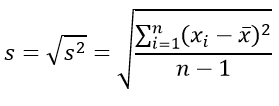

In [325]:
x = df.Age  # construir a entrada x
k = df.Age.mean()  # calcular a média
n = len(df.Age)  # tamanho da entrada

def dmv(x): # criar uma função que precisa de uma entrada x
  aux = np.array((x-k)**2)  # auxiliar que monta um vetor com a entrada subtraída da média elevada ao quadrado
  return aux.sum()/(n-1)  # saída da função: soma dos termos do vetor aux dividida por (n-1)

print("Resultado do desvio padrão: ", np.sqrt(dmv(x)) )  # informa o resultado do desvio padrão

Resultado do desvio padrão:  4.826087009126065


In [326]:
df.std()

<ipython-input-326-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


JoiningYear                  1.863377
PaymentTier                  0.561435
Age                          4.826087
ExperienceInCurrentDomain    1.558240
LeaveOrNot                   0.475047
dtype: float64

In [327]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


#Correlação entre variáveis

<ipython-input-328-f33825a16e92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True) #annot mostra os coeficientes da matriz


<Axes: >

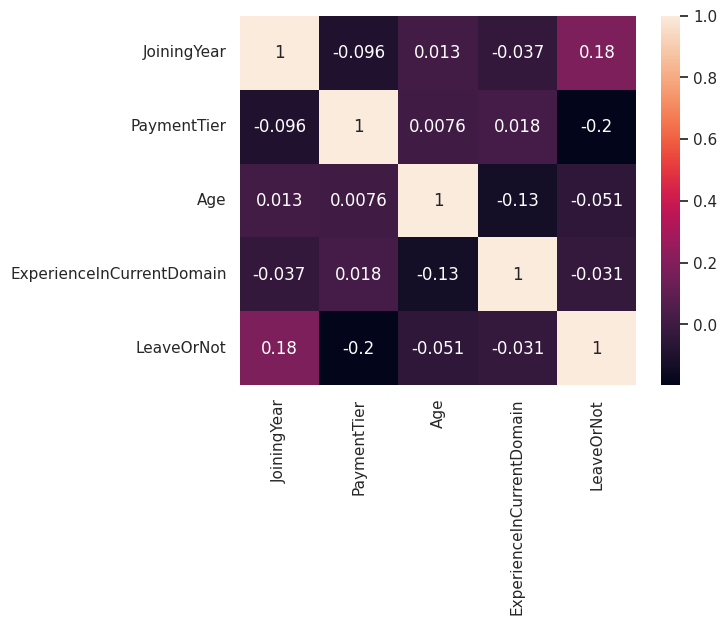

In [328]:
sn.heatmap(df.corr(), annot=True) #annot mostra os coeficientes da matriz

<ipython-input-329-a6b7a76ff0e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(dfcc.corr(), annot=True) #annot mostra os coeficientes da matriz


<Axes: >

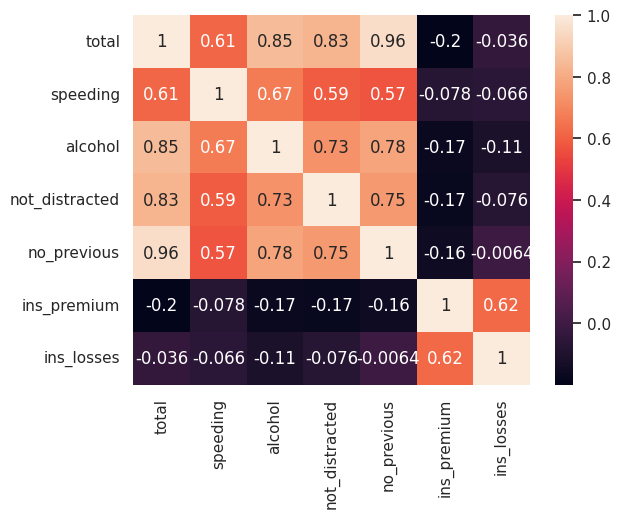

In [329]:
sn.heatmap(dfcc.corr(), annot=True) #annot mostra os coeficientes da matriz

#Gráfico de dispersão

In [330]:
tips = sn.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

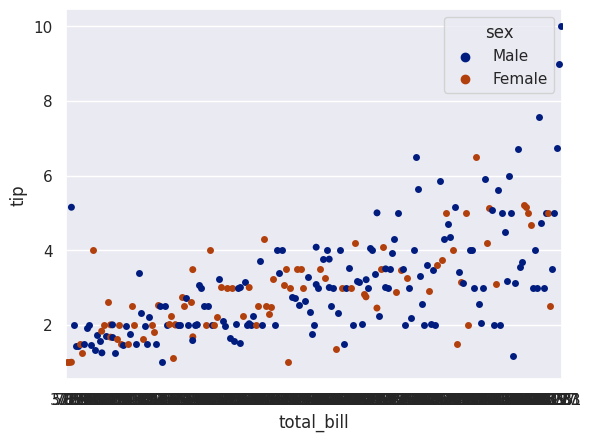

In [331]:
sn.stripplot(x="total_bill", y="tip", hue='sex', data=tips)


#Regressão Linear

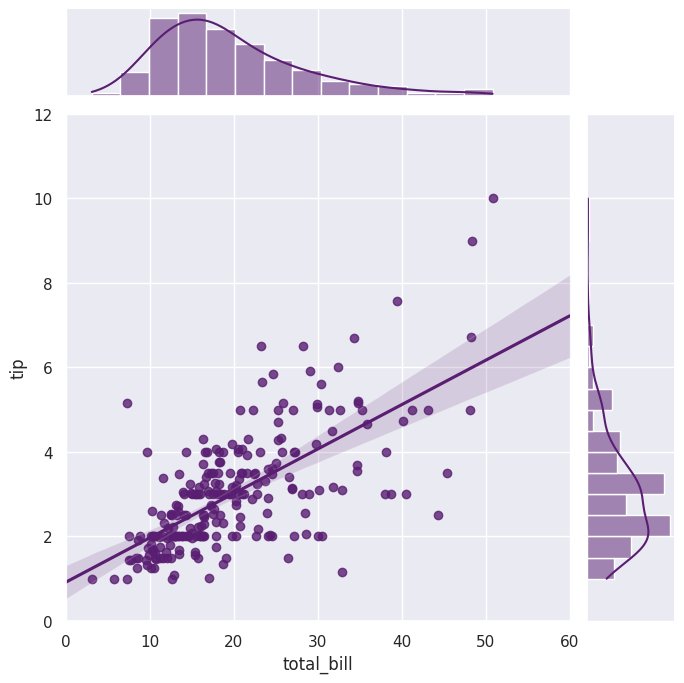

In [332]:
sn.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [333]:
dft = sn.load_dataset("titanic")
dft.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


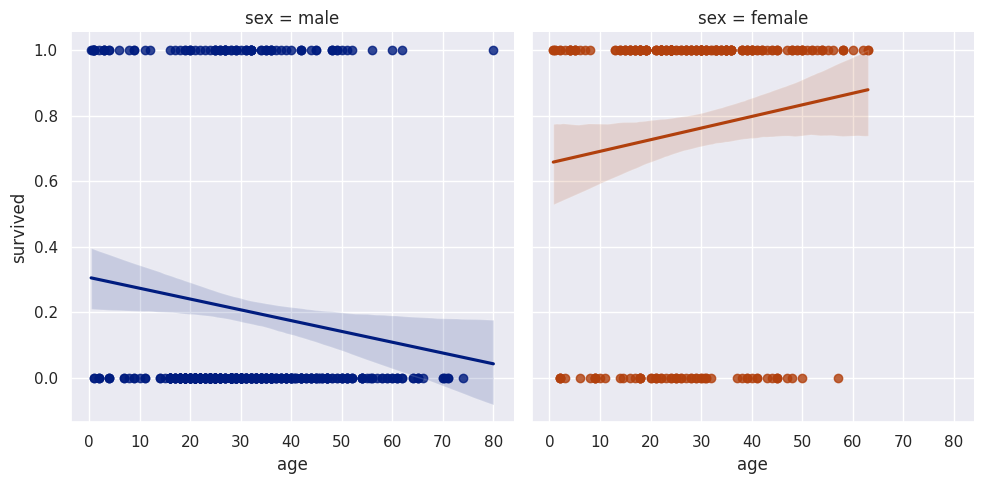

In [334]:
sn.lmplot(x='age', y='survived', data=dft, hue='sex' , col='sex')

In [335]:
dfcc = sn.load_dataset("car_crashes")
dfcc.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


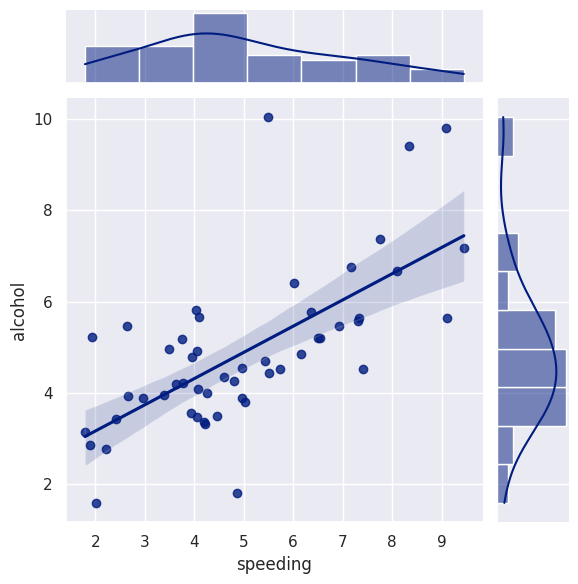

In [336]:
sn.jointplot(x='speeding', y='alcohol', data=dfcc, kind="reg")


#Coeficiente de variação - estabilidade

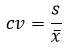

In [337]:
cv_idade = df.Age.std()/df.Age.mean()  # calcular cv
cv_experiencia = df.ExperienceInCurrentDomain.std()/df.ExperienceInCurrentDomain.mean()
print("cv das idades: ", cv_idade , "\n cv das experiência: ",  cv_experiencia)   # comparar os cv

cv das idades:  0.1641900667080771 
 cv das experiência:  0.5362790132990134


#Coeficiente de Pearson - assimetria

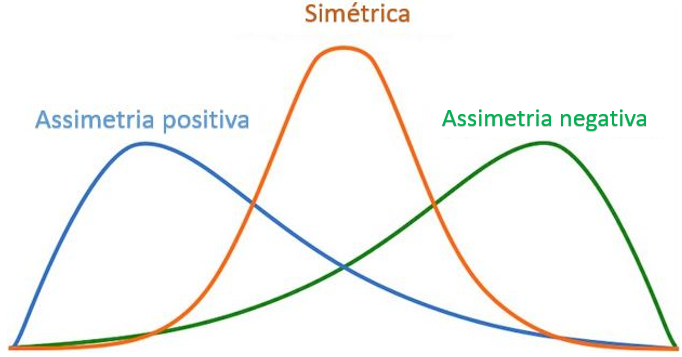


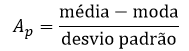

In [338]:
cp_idade = ((df.Age.mean()-df.Age.mode())/df.Age.std()) # calcular cp
cp_experiencia = ((df.ExperienceInCurrentDomain.mean()-df.ExperienceInCurrentDomain.mode())/df.ExperienceInCurrentDomain.std())
print("cp das idades: ", cp_idade , "\n cp das rendas: ",  cp_experiencia)   # comparar os cp

cp das idades:  0    0.703115
Name: Age, dtype: float64 
 cp das rendas:  0    0.581202
Name: ExperienceInCurrentDomain, dtype: float64


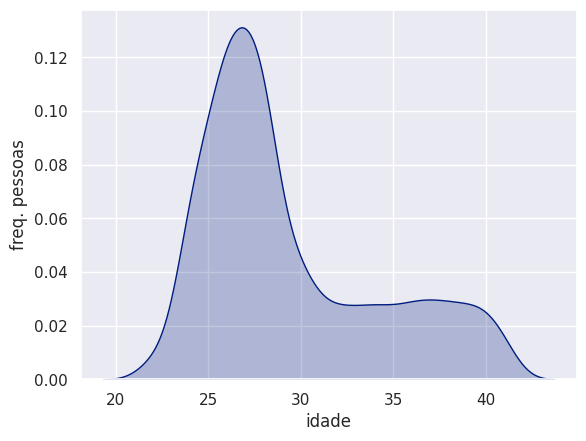

In [339]:
idade = df.Age  # coluna analisada
sn.kdeplot(data=idade, fill=True)  # tipo do gráfico com preenchimento de cor
plt.ylabel('freq. pessoas')  # nome do eixo y
plt.xlabel('idade')  # nome do eixo x
plt.show()  # exibir gráfico

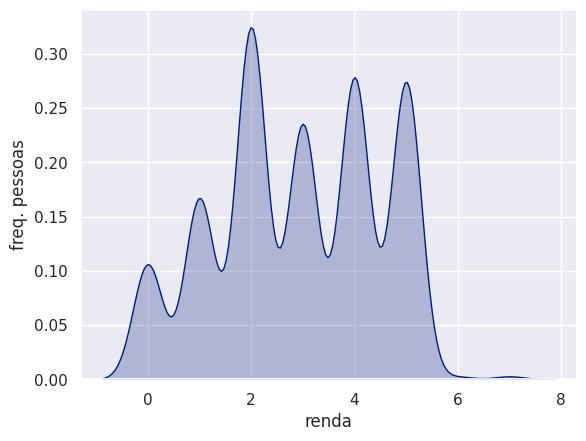

In [340]:
experiencia = df.ExperienceInCurrentDomain  # coluna analisada
sn.kdeplot(data=experiencia, fill=True)  # tipo do gráfico com preenchimento de cor e limite para os eixos
plt.ylabel('freq. pessoas')  # nome do eixo y
plt.xlabel('renda')  # nome do eixo x
plt.show()  # exibir gráfico

#Curtose

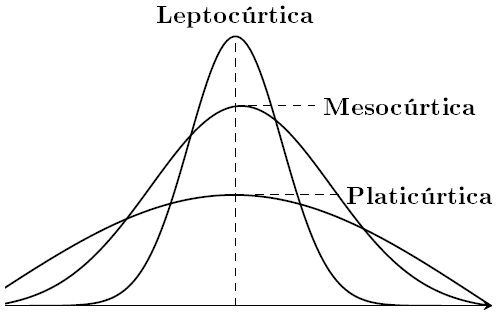


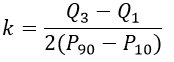


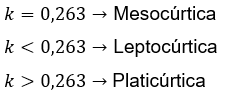

In [341]:
# Ordena e salva em um novo DataFrame
dfo = df.sort_values(by="Age")

In [342]:

n=len(dfo.Age)

Q1=np.quantile(df.Age, .25)  # primeiro quartil
Q3=np.quantile(df.Age, .75)  # terceiro quartil
ip90=np.percentile(df.Age, 90)  # percentil 90
ip10=np.percentile(df.Age, 10)  # percentil 10

k=((Q3-Q1)/2)/(ip90-ip10)  # fórmula

print("A curtose é: ", k)

A curtose é:  0.21428571428571427


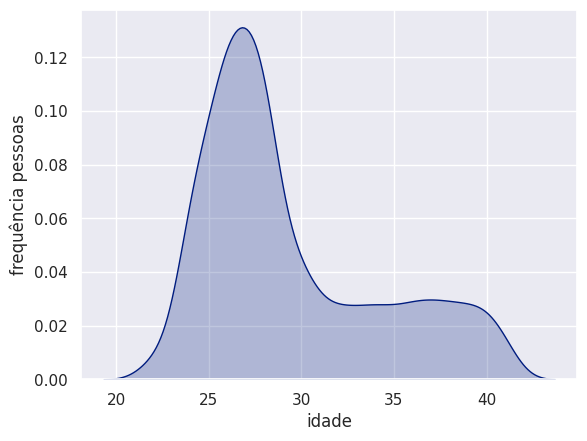

In [343]:
idade = df.Age  # coluna analisada

sn.kdeplot(idade, fill=True)  # dristribuição

plt.ylabel('frequência pessoas')  # nome do eixo y
plt.xlabel('idade')  # nome do eixo x

plt.show()  # exibir gráfico

> Faremos o mesmo agora para a coluna de experiência:

In [344]:
dfo = df.sort_values(by="ExperienceInCurrentDomain")

In [345]:
n=len(dfo.ExperienceInCurrentDomain)

Q1=np.quantile(df.ExperienceInCurrentDomain, .25)  # primeiro quartil
Q3=np.quantile(df.ExperienceInCurrentDomain, .75)  # terceiro quartil
ip90=np.percentile(df.ExperienceInCurrentDomain, 90)  # percentil 90
ip10=np.percentile(df.ExperienceInCurrentDomain, 10)  # percentil 10

k=((Q3-Q1)/2)/(ip90-ip10)  # fórmula

print("A curtose é: ", k)

A curtose é:  0.25


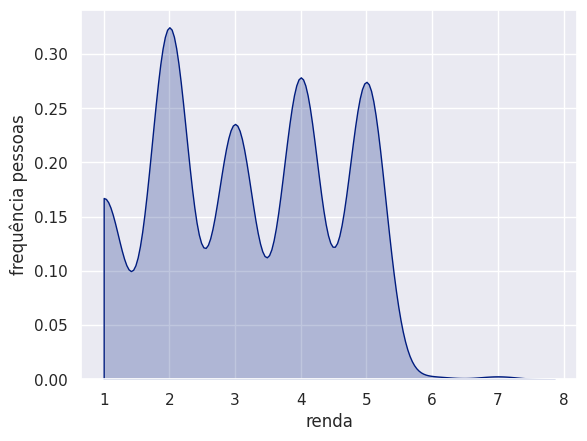

In [346]:
renda = dfo.ExperienceInCurrentDomain  # coluna analisada

sn.kdeplot(renda, fill=True, clip=(1,10000))  # quantidade de intervalos - não cumulativo

plt.ylabel('frequência pessoas')  # nome do eixo y
plt.xlabel('renda')  # nome do eixo x

plt.show()  # exibir gráfico

>Comparando as amplitudes:

In [347]:
i = df['Age'].max()-df['Age'].min()  # fórmula
r = df['ExperienceInCurrentDomain'].max()-df['ExperienceInCurrentDomain'].min()  # fórmula
print("A amplitude das idades é: ", i,
      "\n e a amplitude das experiências é: ", r)

A amplitude das idades é:  19 
 e a amplitude das experiências é:  7


# Outros Gráficos

In [348]:
# https://seaborn.pydata.org/examples/scatter_bubbles.html
# Load the example mpg (miles per gallon) dataset
mpg = sn.load_dataset("mpg")

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


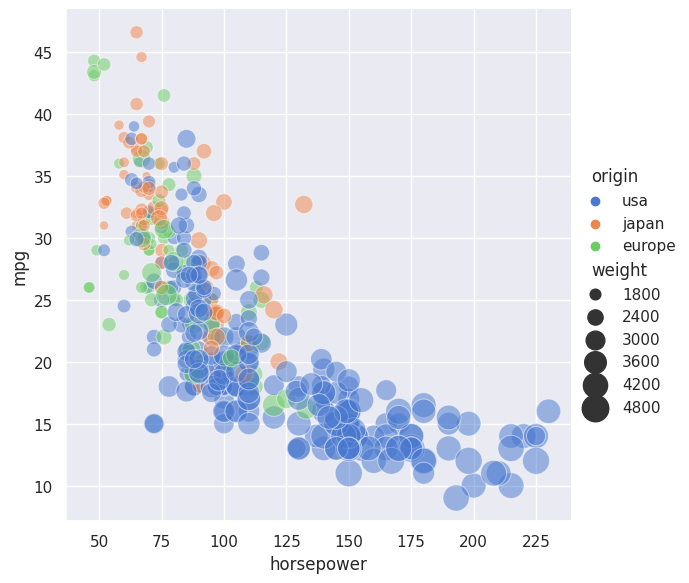

In [349]:
sn.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
           # potência pelo consumo, origem e peso
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

In [350]:
dfp = sn.load_dataset("penguins")
dfp.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


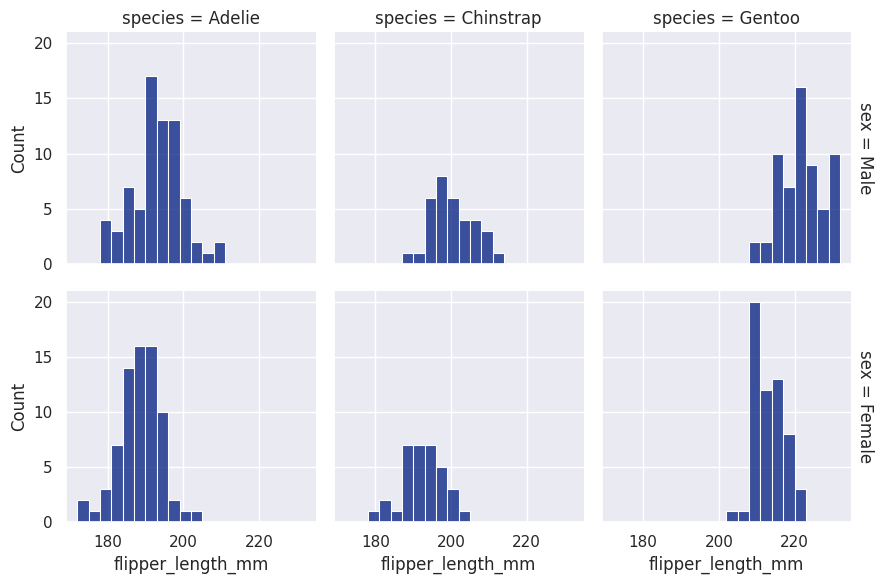

In [351]:
sn.displot(
    dfp, x="flipper_length_mm", col="species", row="sex",
    # comprimento da nadadeira, pela espécia e sexo
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)